# `NSX Mart`

NSX Mart, an India-based shopping complex, operates through offline stores across the country. 
The dataset provided contains comprehensive data from the previous year's sales and trends. The management is keen to capture key metrics and insights into shopping behavior and sales performance across its stores.

This project aims to uncover valuable patterns and trends that can inform data-driven decisions. The analysis will focus on various aspects such as customer demographics, spending scores, product preferences, and temporal sales trends. Understanding customer behavior and spending patterns is crucial for business success. Through data analysis and visualization, we will identify key customer segments, analyze their behaviors and provide actionable insights.
This comprehensive exploratory data analysis (EDA) will serve as a foundational step in enhancing customer satisfaction and boosting the mall's overall performance.


# FETCHING DATASET

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv("Sales.csv", encoding="latin-1")

# DATA PRE-PROCESSING

**`(A) ANALYSIS:-`**

In [31]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [32]:
df.shape

(11251, 15)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [34]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [35]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

**`(B) DATA CLEANING:-`**

In [36]:
#Droping Blank Columns

df=df.drop(["Status","unnamed1"],axis=1)

In [37]:
#Renaming "Marital_Status" column Values
df["Marital_Status"]=df["Marital_Status"].astype(str).str.replace("0","Unmarried")
df["Marital_Status"]=df["Marital_Status"].astype(str).str.replace("1","Married")

#Changing "Marital_Status" column Datatype
df["Marital_Status"]=df["Marital_Status"].astype(object)

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  object 
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB
None


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206.0


In [38]:
#Droping Null Values from the Dataset(from "Amount Column")
df.dropna(inplace=True)

#Changing the Datatype of "Amount" column
df["Amount"]=df["Amount"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  object
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(3), object(9)
memory usage: 1.2+ MB


In [39]:
#Renaming "Gender" column Values

df["Gender"]=df["Gender"].str.replace("F","Female")
df["Gender"]=df["Gender"].str.replace("M","Male")

In [40]:
#Renaming the "Cust_name" column

df.rename(columns={"Cust_name":"Customers"}, inplace=True)
df

,User_ID,Customers,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,Male,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,Male,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,Female,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,Male,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206


# EXPLORATORY DATA ANALYSIS

In [41]:
df.columns

Index(['User_ID', 'Customers', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

Text(55.05450000000002, 0.5, 'Sales Amount (Amount)')

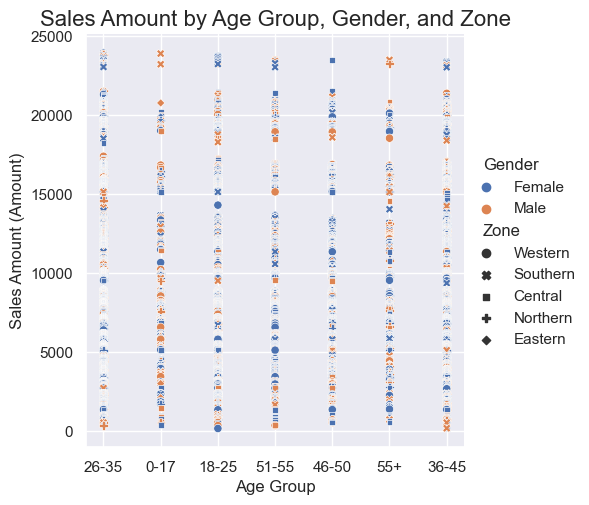

In [42]:
sns.relplot(x="Age Group", y="Amount", kind="scatter",hue="Gender",style="Zone", data=df)

plt.title('Sales Amount by Age Group, Gender, and Zone', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Sales Amount (Amount)', fontsize=12)

*The above plot shows the data about the customers on the basis of Gender and Zone with respect to Sales Amount*

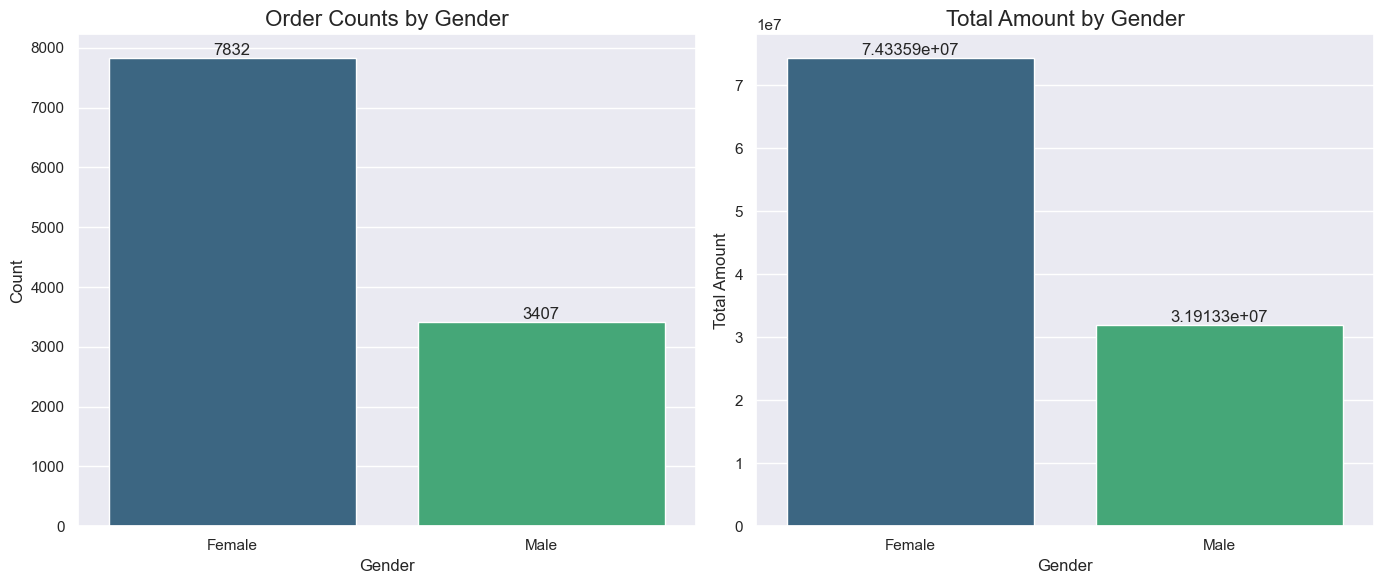

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

# Count vs. Gender (1st)
A11=sns.countplot(ax=axes[0], x="Gender", data=df, palette="viridis")
A11.set_title("Order Counts by Gender", fontsize=16)
A11.set_xlabel("Gender",fontsize=12)
A11.set_ylabel("Count", fontsize=12)
for bars in A11.containers:
    A11.bar_label(bars)

# Amount vs. Gender (2nd)
AmtXgen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
A12=sns.barplot(ax=axes[1], x='Gender', y='Amount', data=AmtXgen, palette="viridis")
A12.set_title("Total Amount by Gender", fontsize=16)
A12.set_xlabel("Gender", fontsize=12)
A12.set_ylabel("Total Amount", fontsize=12)
for bars in A12.containers:
    A12.bar_label(bars)

plt.tight_layout()
plt.show()

*The 1st visualization shows that most of the buyers are females*

*The 2nd visualization shows that females have greater purchasing power than men*

In [44]:
df["Gender"].value_counts()

Gender
Female    7832
Male      3407
Name: count, dtype: int64

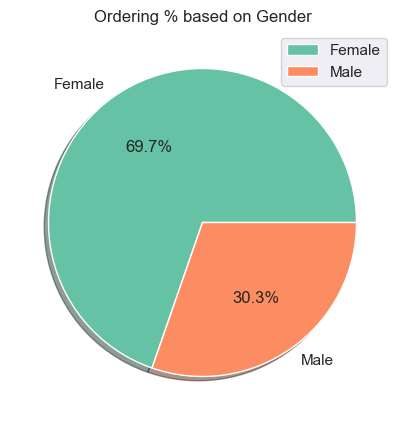

In [45]:
#Order % based on Gender

a1=df["Gender"].value_counts().index
a2=df["Gender"].value_counts().values

sns.set(rc={'figure.figsize':(8,5)})
plt.pie(a2,labels=a1,explode=(0,0),shadow=True, autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title('Ordering % based on Gender', fontsize=12)
plt.legend(loc=1)

*The above pie chart shows that almost 70% of orders have been done by females*

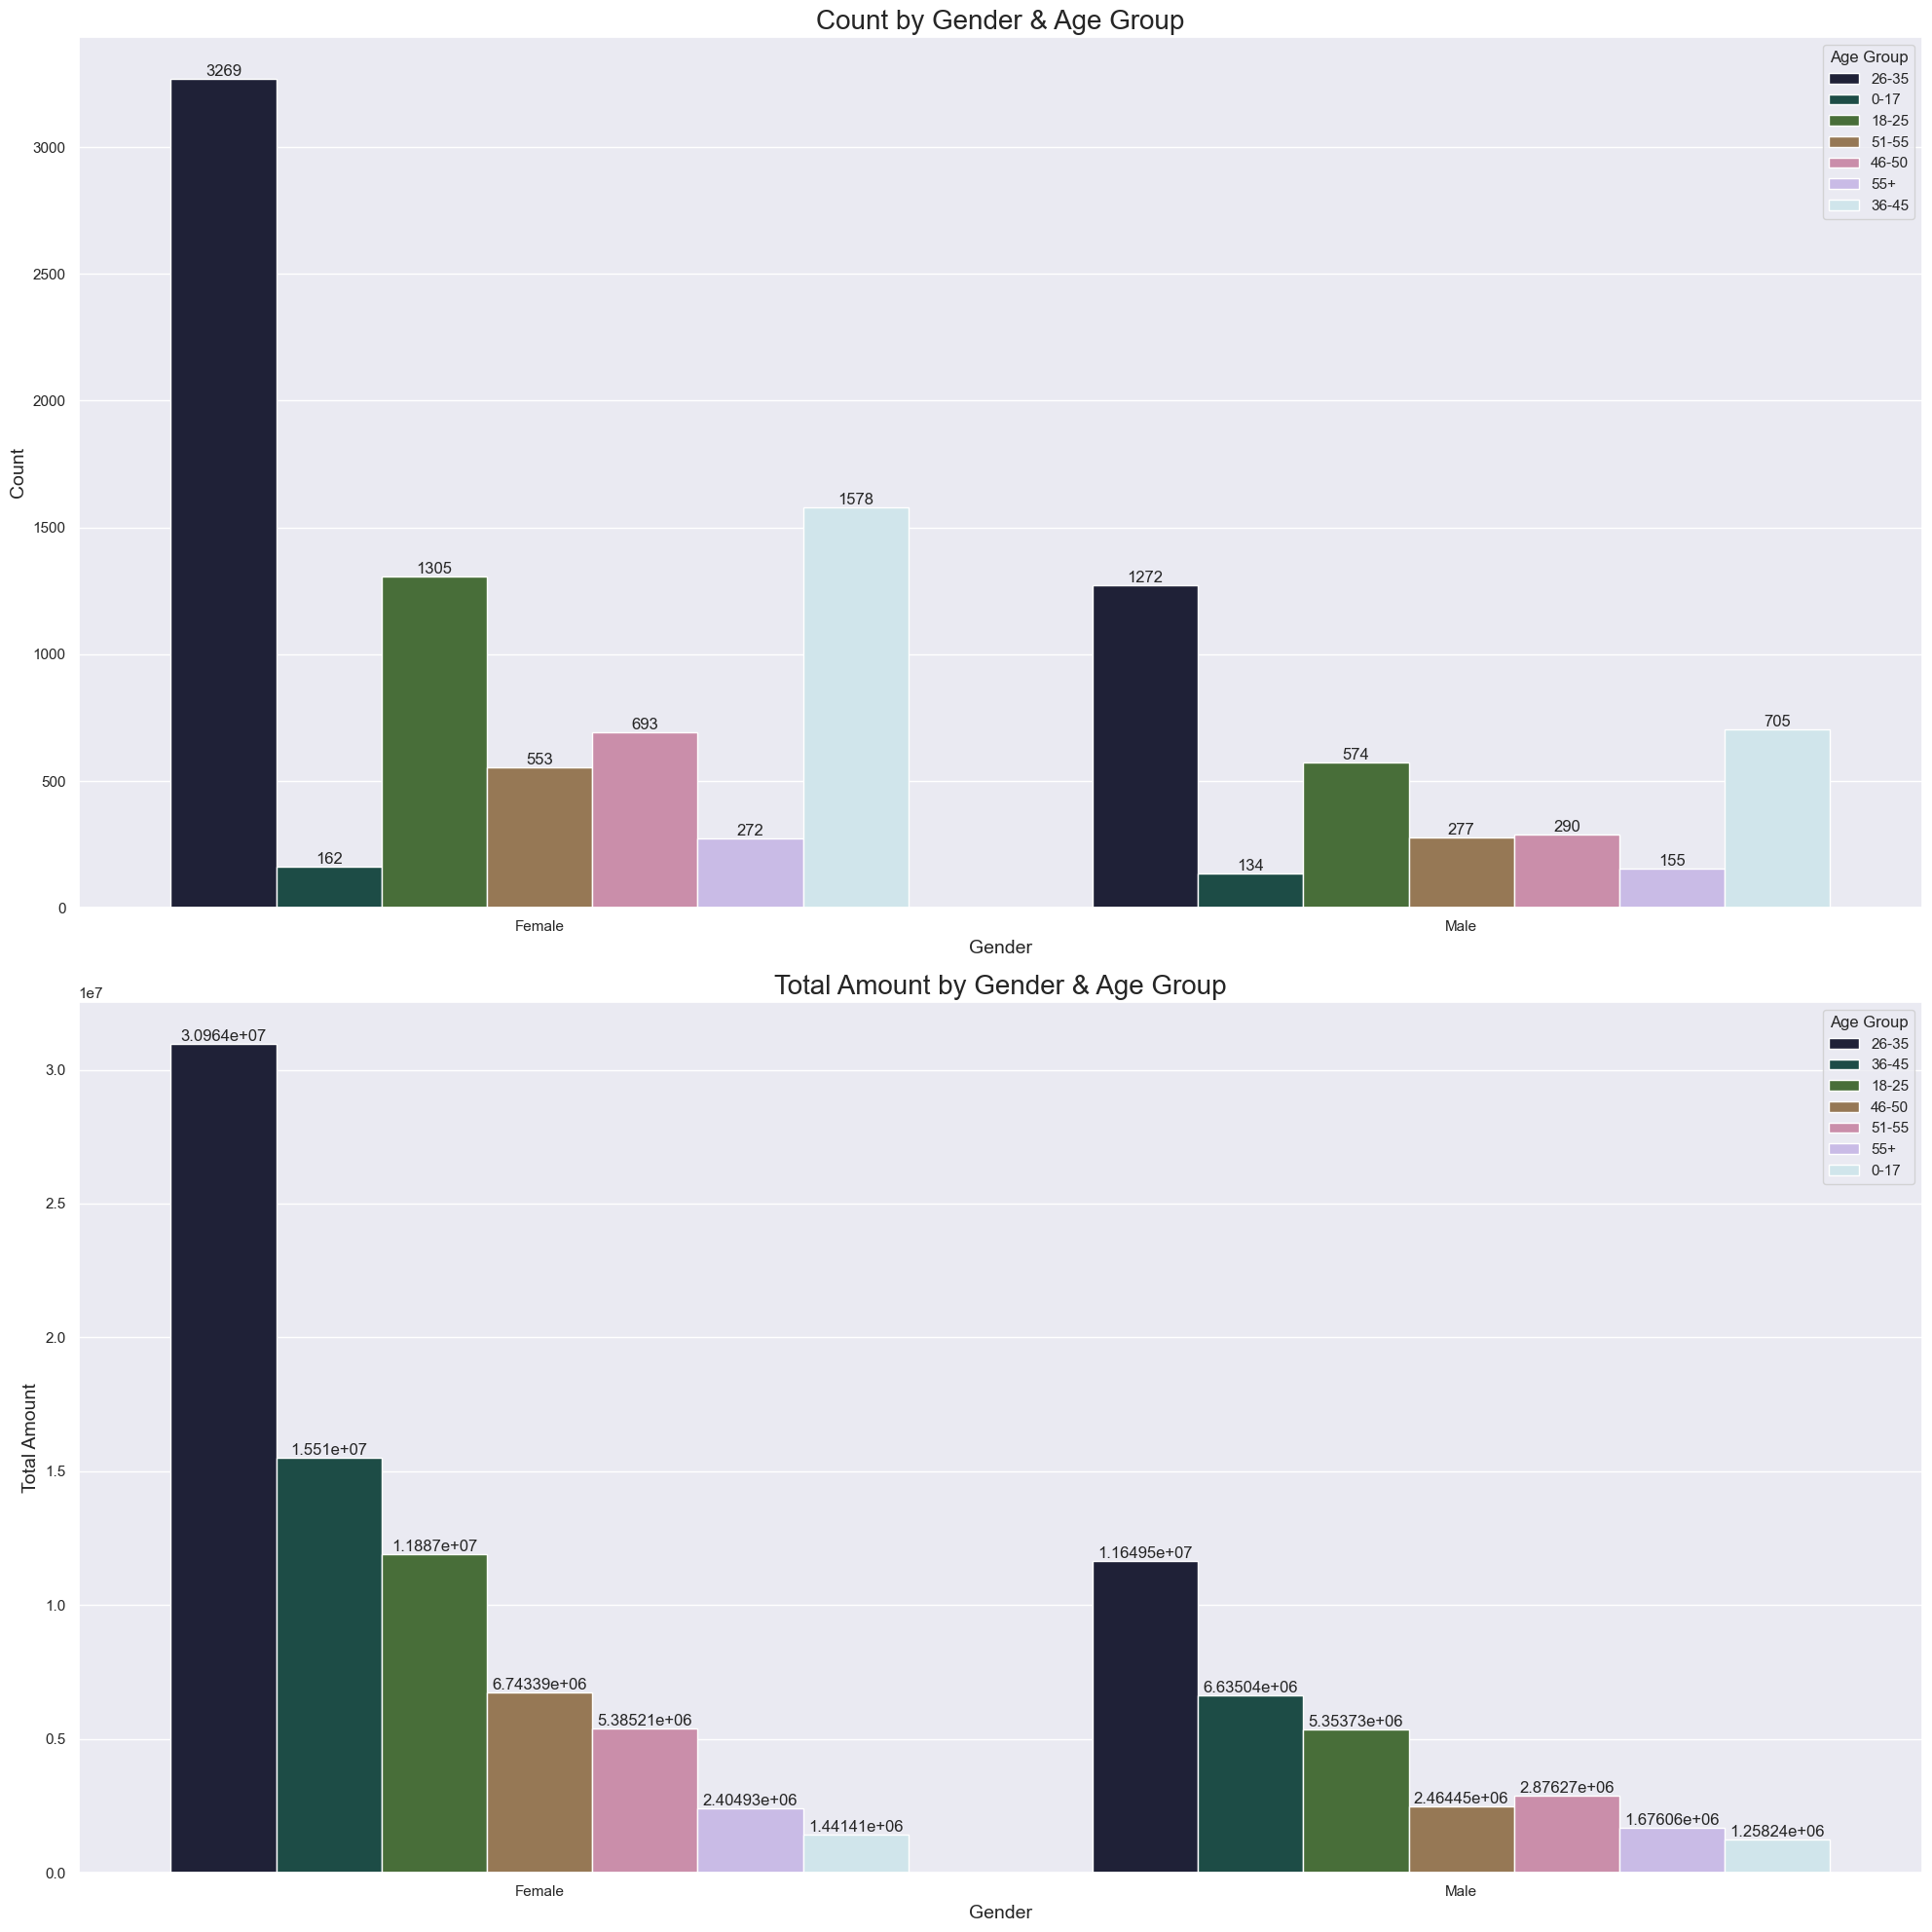

In [46]:
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

# Count vs. Gender(& Age Group) 
A21 = sns.countplot(ax=axes[0], x="Gender", hue="Age Group", data=df, palette="cubehelix")
A21.set_title("Count by Gender & Age Group", fontsize=20)
A21.set_xlabel("Gender", fontsize=14)
A21.set_ylabel("Count", fontsize=14)
for bars in A21.containers:
    A21.bar_label(bars)

# Amount vs. Gender(& Age Group) 
AmtXmarital = df.groupby(["Gender", "Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
A22 = sns.barplot(ax=axes[1], x="Gender", y="Amount", hue="Age Group", data=AmtXmarital, palette="cubehelix")
A22.set_title("Total Amount by Gender & Age Group", fontsize=20)
A22.set_xlabel("Gender", fontsize=14)
A22.set_ylabel("Total Amount", fontsize=14)
for bars in A22.containers:
    A22.bar_label(bars)


plt.tight_layout()
plt.show()

*The 1st Graph shows that most of the buyers are females of Age Group b/w 26-35 years. Even if we see gender-wise, the customers of 26-35 years age group are most of the buyers, in both male and female.*

*The 2nd Graph shows that the customers of 26-35 years age group in female have the maximum purchasing power. Even if we see gender-wise, the customers of 26-35 years age group have the maximum purchasing power, in both male and female.*

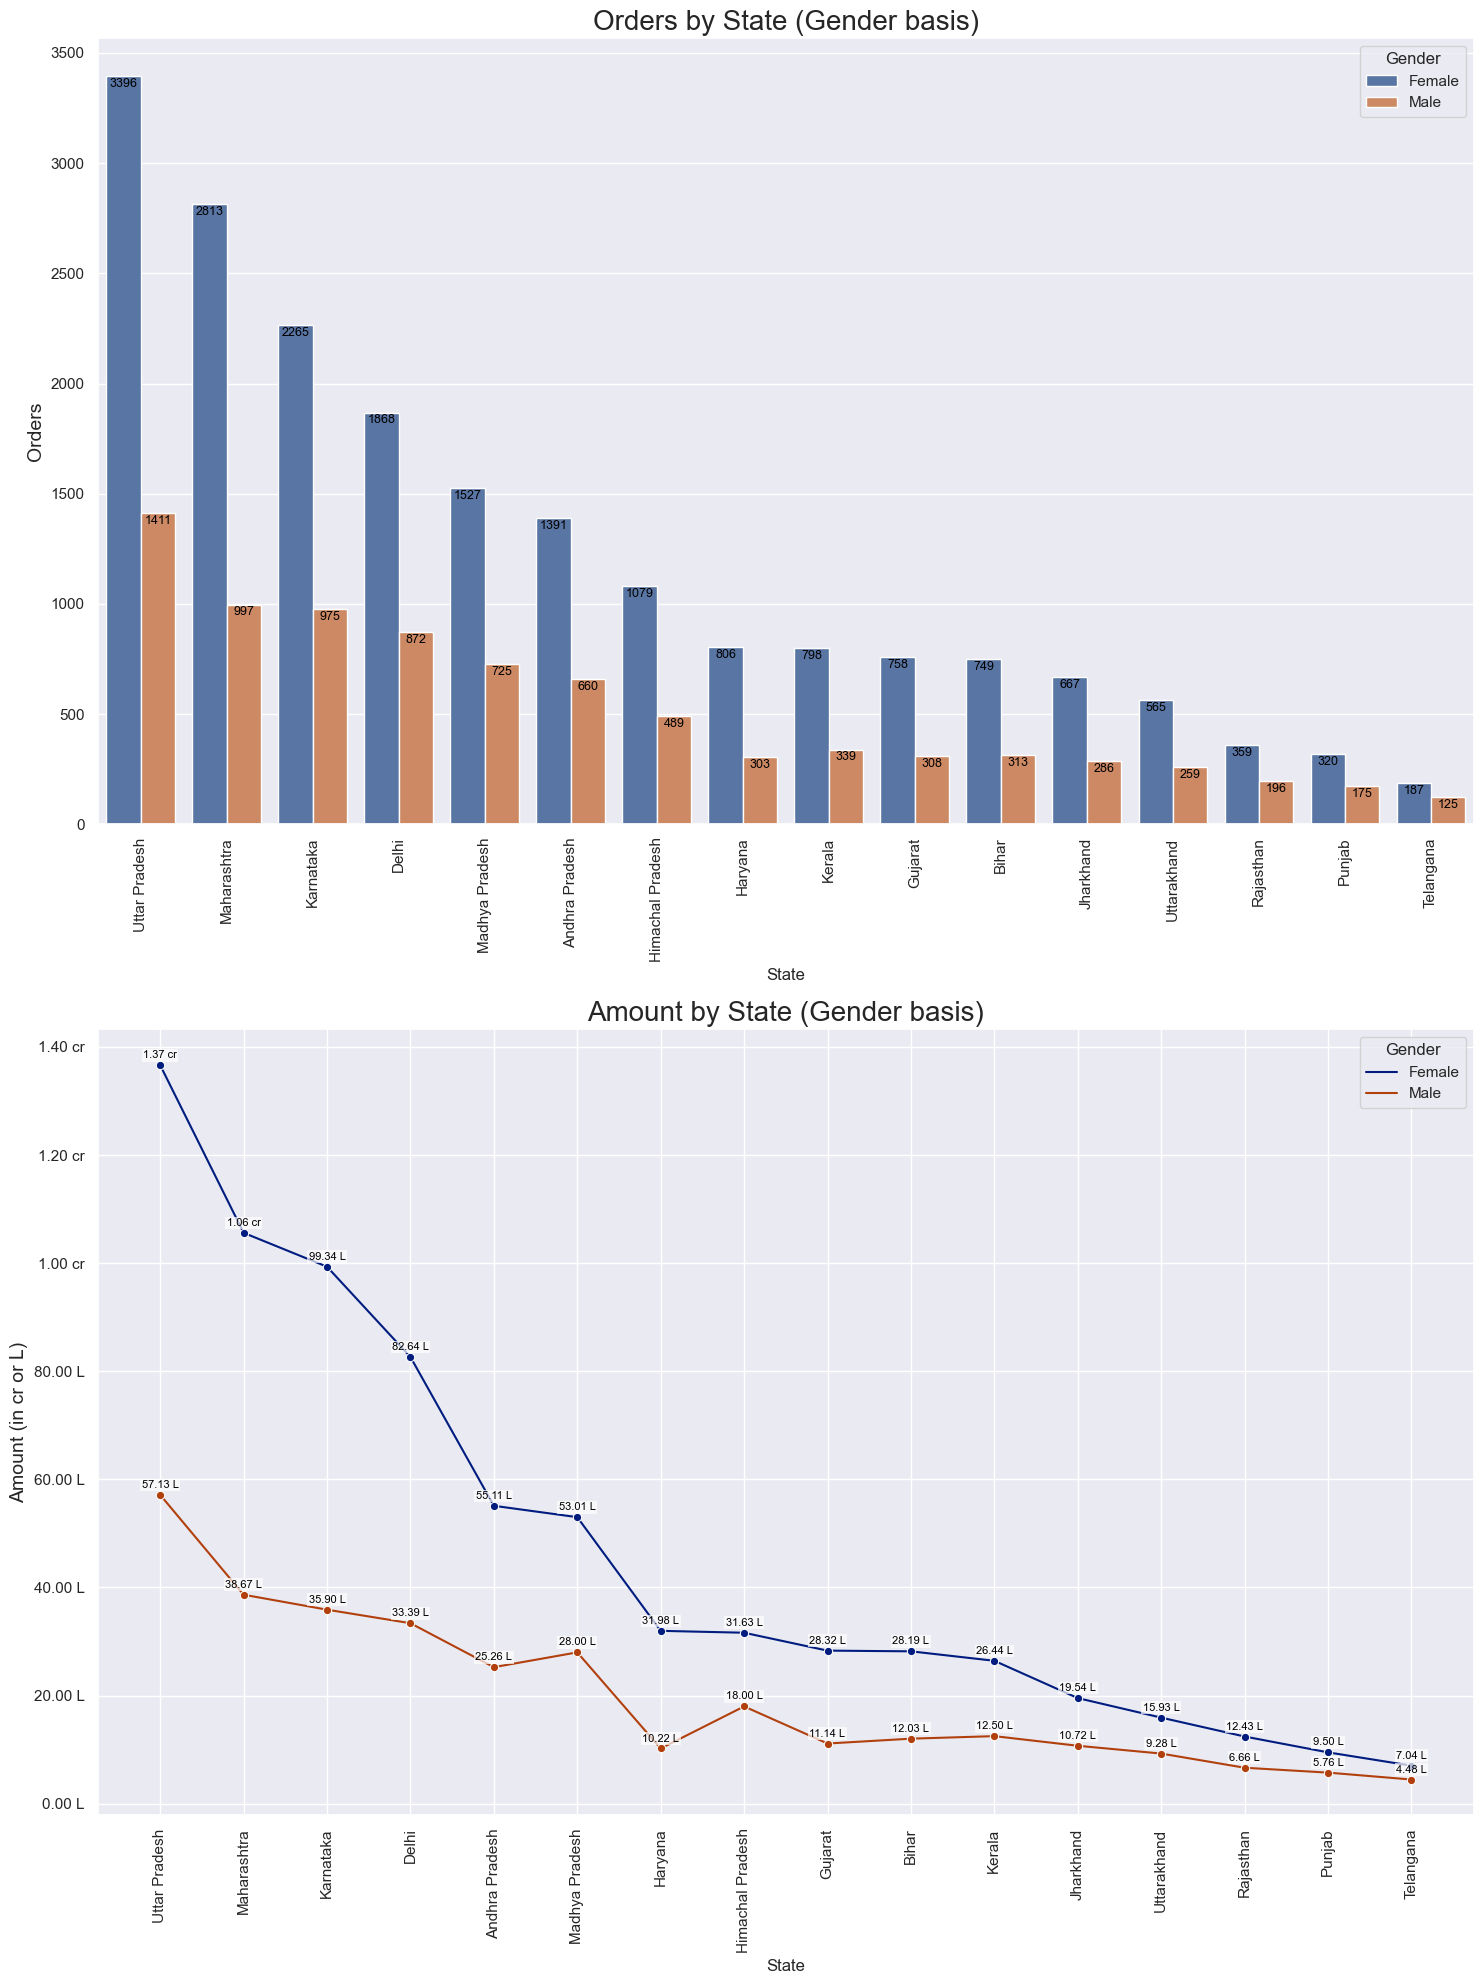

In [47]:
fig, (A31, A32) = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))

# Orders vs State(& Gender)
OrderXstate = df.groupby(["State", "Gender"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
sns.barplot(ax=A31, x="State", y="Orders", hue="Gender", data=OrderXstate)
A31.set_ylabel("Orders", fontsize=14)
A31.set_title("Orders by State (Gender basis)", fontsize=20)
A31.tick_params(axis='x', rotation=90)
for bars in A31.containers:
    A31.bar_label(bars, label_type='edge', padding=-10, fontsize=9, color='black')

# Amount vs State(& Gender)
Amountxstate = df.groupby(["State", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.lineplot(ax=A32, x="State", y="Amount", hue="Gender", data=Amountxstate, marker="o", palette="dark")
A32.set_ylabel("Amount (in cr or L)", fontsize=14)
A32.set_title("Amount by State (Gender basis)", fontsize=20)
A32.grid(True)

def format_crore(value):
    return f'{value / 1e7:.2f} cr' if value >= 1e7 else f'{value/1e5:.2f} L'
A32.set_yticklabels([format_crore(y) for y in A32.get_yticks()])
A32.tick_params(axis='x', rotation=90)

for line in A32.lines:
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    for x, y in zip(xdata, ydata):
        A32.annotate(
            format_crore(y), 
            xy=(x, y), 
            textcoords="offset points", 
            xytext=(0, 5), 
            ha='center', 
            fontsize=8, 
            color='black', 
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
        )

plt.tight_layout()
plt.show()

*The 1st graph shows that in every state, females have done maximum of the orders as compared to males. UP, Maharashtra, Karnataka, Delhi, MP are the top 5 states in terms of maximum orders, accordingly. Jharkhand, Uttrakhand, Rajasthan, Punjab & Telangana are states with least orders (decreasingly)*

*The 2nd graph shows that in every state, females have greater purchasing power than males. UP, Maharashtra, Karnataka, Delhi, AP are the top 5 states in terms of Amount spent/purchasing. Jharkhand, Uttrakhand, Rajasthan, Punjab & Telangana are states with least Amounts spent (decreasingly)*

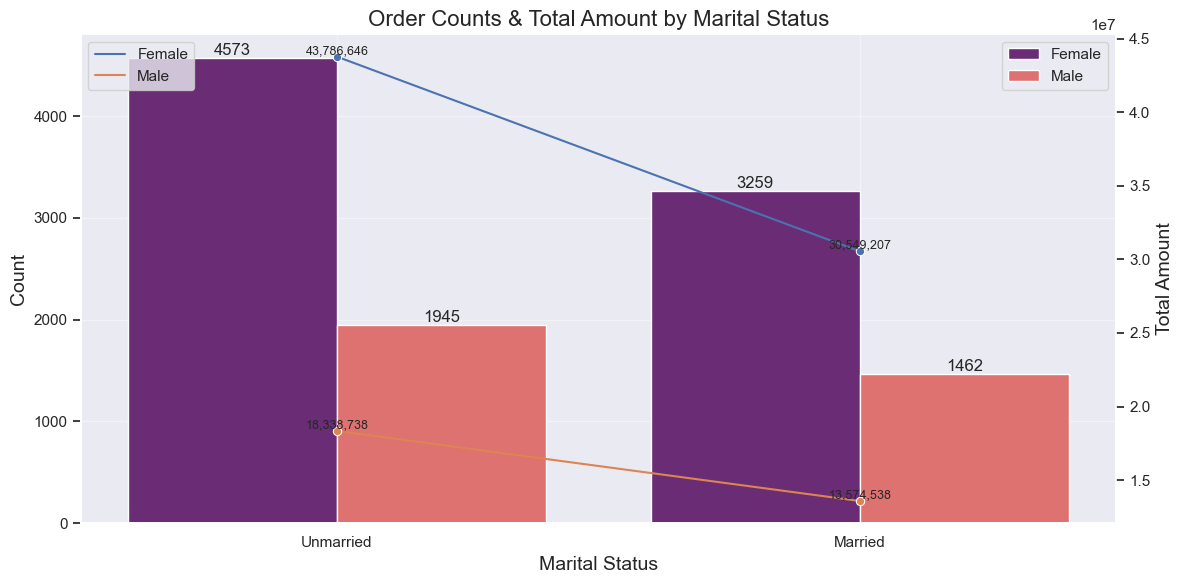

In [48]:
fig, A41 = plt.subplots(figsize=(12, 6))

# Order Counts & Total Amount by Marital Status(&Gender)

A41=sns.countplot(x="Marital_Status", hue="Gender", data=df, palette="magma")
A41.set_xlabel("Marital Status", fontsize=14)
A41.set_ylabel("Count", fontsize=14)
A41.set_title("Order Counts & Total Amount by Marital Status", fontsize=16)
for bars in A41.containers:
    A41.bar_label(bars)

A42 = A41.twinx()
AmtXmarital = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
A42=sns.lineplot(x='Marital_Status', y='Amount', hue='Gender', marker='o', data=AmtXmarital)
A42.set_ylabel("Total Amount", fontsize=14)
for line in A42.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        A42.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9)
A41.legend()
A42.legend(loc=2)
A41.grid(True, alpha=0.4)
A42.grid(False) 

plt.tight_layout()
plt.show()

In [49]:
df["Marital_Status"].value_counts()

Marital_Status
Unmarried    6518
Married      4721
Name: count, dtype: int64

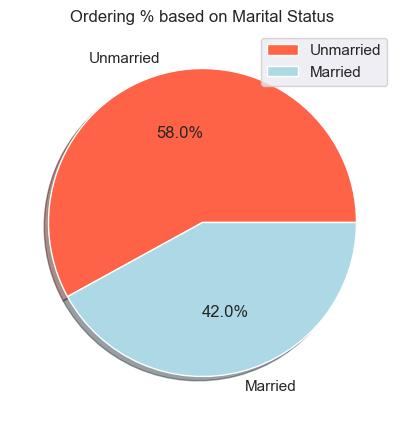

In [50]:
# Ordering % based on Marital_Status

b1=df["Marital_Status"].value_counts().index
b2=df["Marital_Status"].value_counts().values

sns.set(rc={'figure.figsize':(8,5)})
plt.pie(b2,labels=b1,explode=(0,0),shadow=True, autopct="%1.1f%%", colors=['tomato', 'lightblue'])
plt.title("Ordering % based on Marital Status", fontsize=12)
plt.legend(loc=1)

*The above Pie Chart shows that almost 60% of Orders have been placed by Unmarried customers*

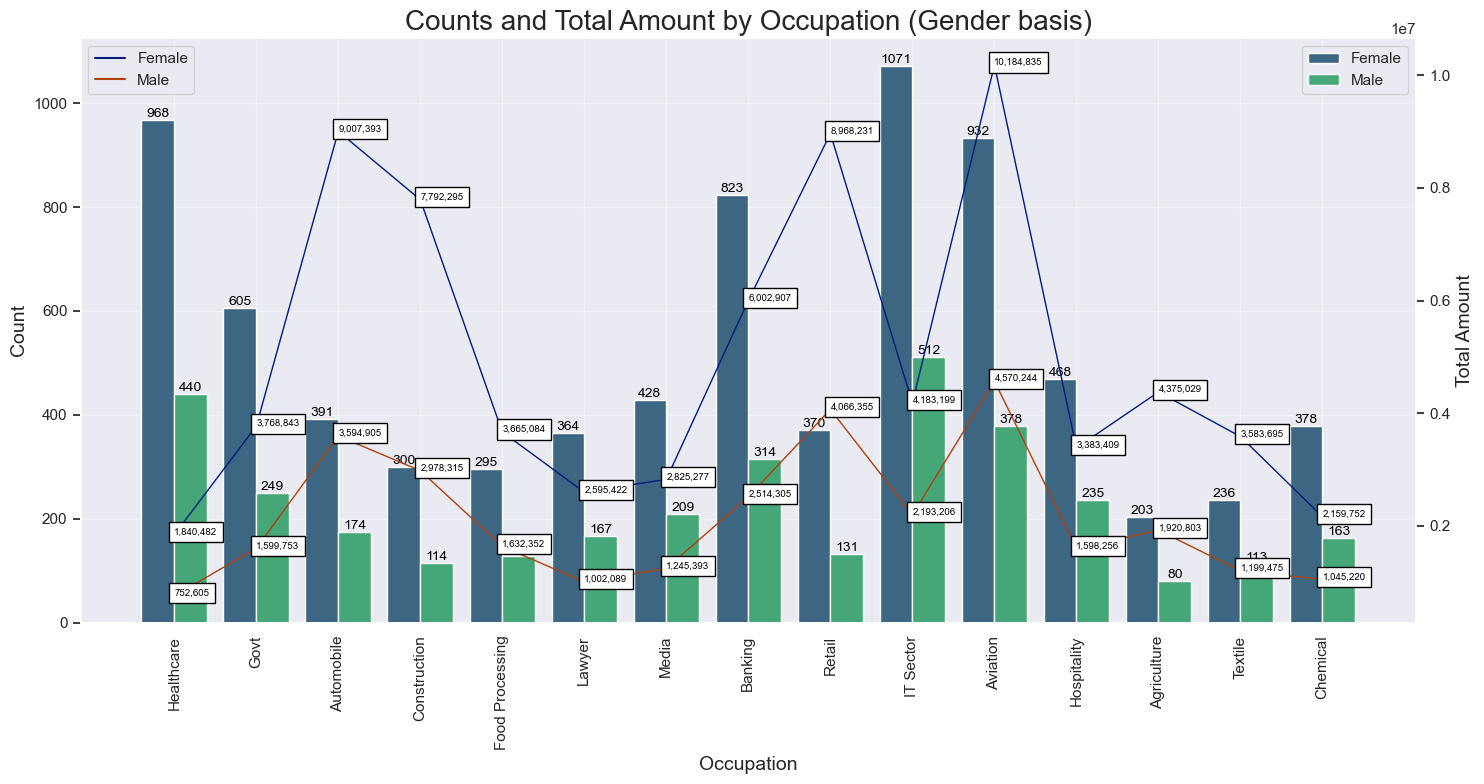

In [51]:
fig, A51 = plt.subplots(figsize=(15, 8))

# Count & Total Amount vs Occupation(& Gender)

A51=sns.countplot(x="Occupation", hue="Gender", data=df, palette='viridis')
for bars in A51.containers:
    A51.bar_label(bars, fontsize=10, color='black')
A51.set_title('Counts and Total Amount by Occupation (Gender basis)', fontsize=20)
A51.set_xlabel('Occupation', fontsize=14)
A51.set_ylabel('Count', fontsize=14)
A51.set_xticklabels(A51.get_xticklabels(), rotation=90) 

A52 = A51.twinx()
AmtXocc = df.groupby(["Occupation", "Gender"], as_index=False)["Amount"].sum()
A52=sns.lineplot(data=AmtXocc, x="Occupation", y="Amount", hue="Gender", marker="o", linewidth=1, palette='dark')
for line in A52.get_lines():
    xdata, ydata = line.get_data()
    for i in range(len(xdata)):
        A52.text(xdata[i], ydata[i], f'{ydata[i]:,.0f}', color='black',fontsize=7,bbox=dict(facecolor='white', edgecolor='black'))
A52.set_ylabel('Total Amount', fontsize=14)

A51.legend()
A52.legend(loc=2)
A51.grid(True, alpha=0.4)
A52.grid(False)  

plt.tight_layout()
plt.show()

*The above Graph shows that from the Occupations, females are dominant in both numbers and Total amounts.*

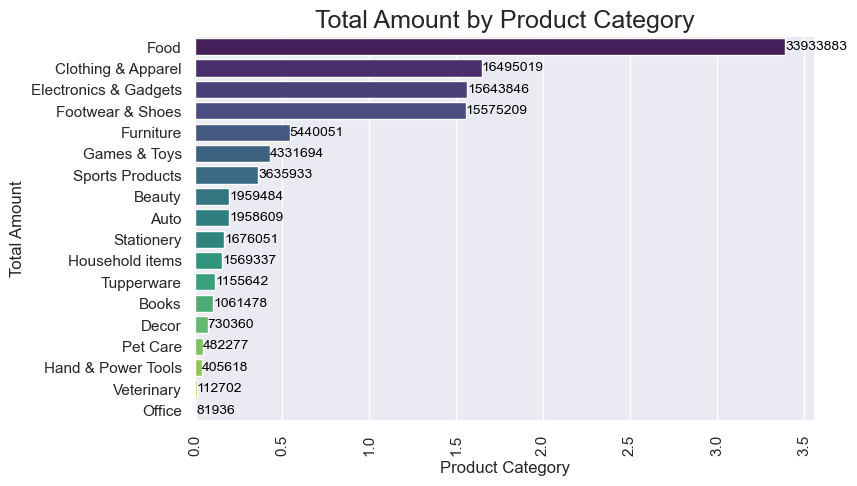

In [52]:
# Total Amount by Product Categories
AmtXproduct = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
A62 = sns.barplot( x="Amount", y="Product_Category", data=AmtXproduct, palette="viridis")
A62.set_title("Total Amount by Product Category", fontsize=18)
A62.set_xlabel("Product Category", fontsize=12)
A62.set_ylabel("Total Amount", fontsize=12)
A62.set_xticklabels(A62.get_xticklabels(), rotation=90)
for bars in A62.containers:
    A62.bar_label(bars, fmt='%d', fontsize=10, color='black')
    
plt.show()

*The 1st Graph shows the Order counts of Product Categories*

*The 2nd Graph shows that Total amounts of Product Categories*

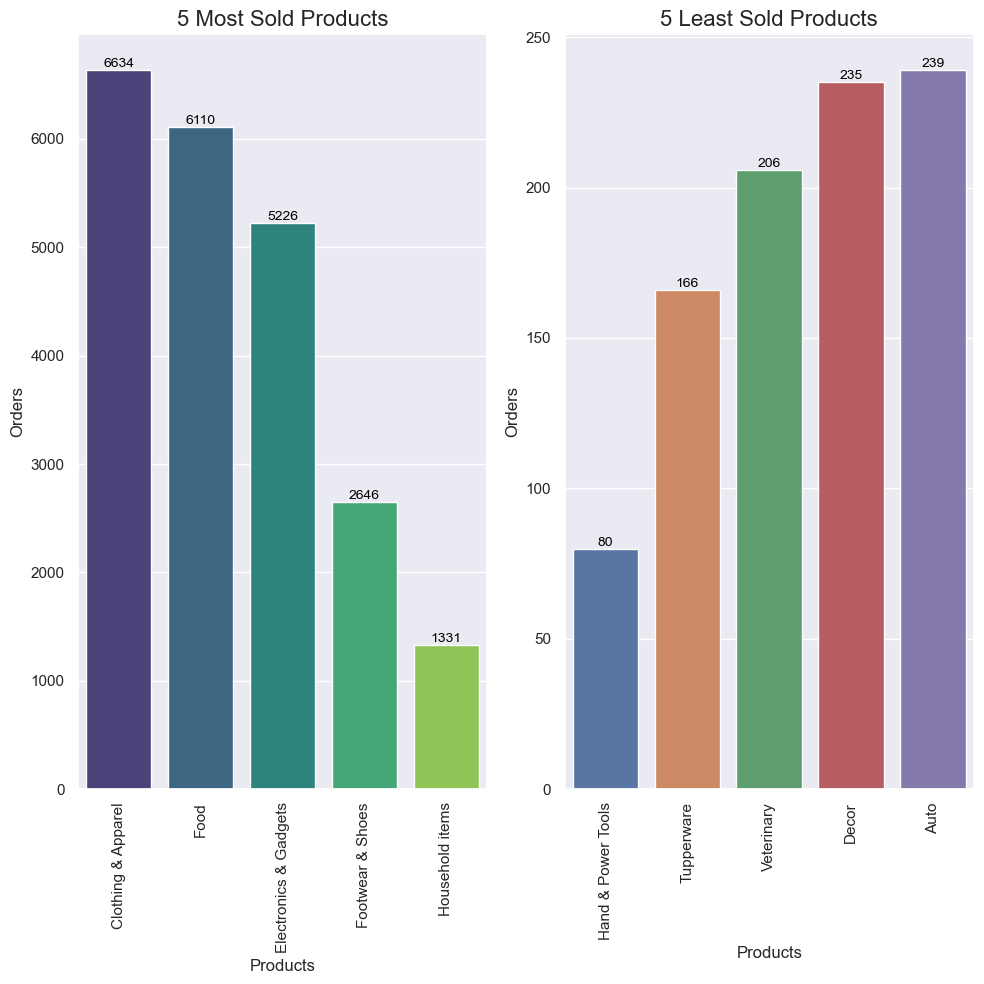

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10), tight_layout=True)

Mostsold = df.groupby('Product_Category', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)
Leastsold = df.groupby('Product_Category', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=True).head(5)

# 10 Most Sold Products
A71=sns.barplot(ax=axes[0], x='Product_Category', y='Orders', data=Mostsold, palette='viridis')
A71.set_title("5 Most Sold Products", fontsize=16)
A71.set_xlabel("Products", fontsize=12)
A71.set_ylabel("Orders", fontsize=12)
A71.set_xticklabels(A71.get_xticklabels(), rotation=90)
for bars in A71.containers:
    A71.bar_label(bars, fontsize=10, color='black')

# 10 Least Sold Products
A72=sns.barplot(ax=axes[1], x='Product_Category', y='Orders', data=Leastsold)
A72.set_title("5 Least Sold Products", fontsize=16)
A72.set_xlabel("Products", fontsize=12)
A72.set_ylabel("Orders", fontsize=12)
A72.set_xticklabels(A72.get_xticklabels(), rotation=90)
for bars in A72.containers:
    A72.bar_label(bars, fontsize=10, color='black')

plt.tight_layout()
plt.show()

*The 1st Graph shows 5 most sold Product Categories.*

*The 2nd Graph shows 5 least sold Produt Categories.*

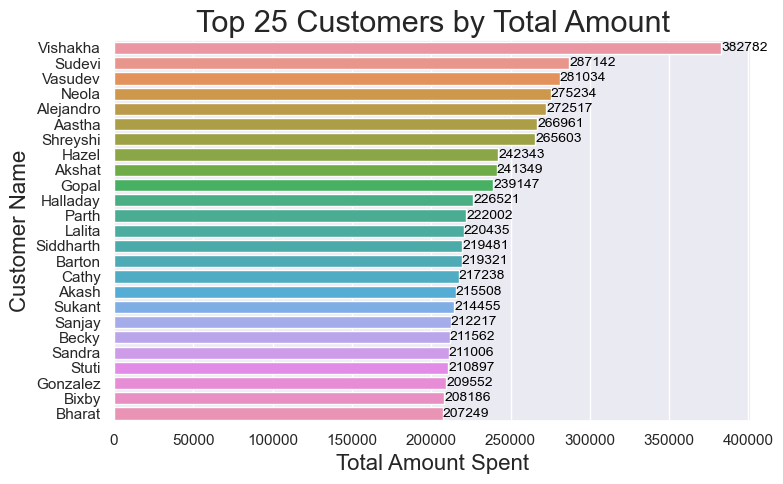

In [54]:
# Top 25 Customers
Topcustomers = df.groupby('Customers', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(25)
A8 = sns.barplot(y="Customers", x="Amount", data=Topcustomers, orient='h')
A8.set_title('Top 25 Customers by Total Amount', fontsize=22)
A8.set_xlabel('Total Amount Spent', fontsize=16)
A8.set_ylabel('Customer Name', fontsize=16)
for bars in A8.containers:
    A8.bar_label(bars, fontsize=10, color='black')
plt.tight_layout()
plt.show()

*The above graph shows top 25 customers based on Amount spent*

# CONCLUSION

**INSIGHTS ON :-**

*`Gender` : On analyzing the purchasing trends between male and female customers, it is found that female customers exhibit greater purchasing power. Consider targeting this demographic with tailored marketing campaigns, product offerings and promotions. For increasing male customers look for patterns in their purchasing behavior such as preferred categories, price points, and purchase frequency. Partner with male influencers or industry experts to promote your products. These partnerships can help build trust and increase brand visibility among male customers.*

*`Age Group` : Understanding the pattern, it tells which age groups are most active in purchasing and what products they prefer. For instance, younger customers might be more interested in fashion and electronics, while older customers might prefer home appliances and groceries. Consider segmenting your customer base.*

*`State/Region` : Analyzing sales by state and zone helps to understand regional preferences. If certain products perform better in specific regions, you can allocate more resources or marketing efforts there. States with least number orders placed, they should be introduced with targeted campaigns based on state-wise customer preferences. Use insights to adjust marketing strategies, allocate resources, or introduce promotions tailored to specific states.*

*`Popular Product Categories` : It is very crucial to identify the most and least popular product categories. Place popular products in prominent locations within the mall or store to maximize visibility and accessibility. Highlight popular products in marketing campaigns to further boost sales. For the unpopular products, consider phasing them out and replacing them with new items that have better potential. Regularly review the performance of both popular and unpopular products and adjust strategies accordingly.*